# Prediction bridge condition ratings unsing KNN

# Preprocessing - Data Cleaning

In [60]:
## Imporitng libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Preprocessing Data

In [87]:
## Import Data

df_hamilton = pd.read_csv("rawdata.csv")

print ("Shape of raw data : ", df_hamilton.shape)

## Dropping Columns that are not required

df_bridge = df_hamilton.drop(['1 - State Name','2022 NBI Structure Number','22 - Owner Agency',
                       '3 - County Name','59 - Superstructure Condition Rating','60 - Substructure Condition Rating',
                             '61 - Channel and Channel Protection Condition Rating'], axis = 1)
print ("Shape of after removing unwanted columns : ", df_bridge.shape)

## Dropping null values

df_bridge.dropna(inplace = True)
print ("Shape of after removing null values : ", df_bridge.shape)

## Deck Condition Ratings and Deck Strucutre Types were in the from of string converting them to integer

df_bridge['58 - Deck Condition Rating'] = df_bridge['58 - Deck Condition Rating'].str.replace(r'\W',"")
df_bridge.drop(df_bridge[df_bridge['58 - Deck Condition Rating'] == 'N'].index, inplace = True)
df_bridge['58 - Deck Condition Rating'].replace('', np.nan, inplace=True)
df_bridge.dropna(subset=['58 - Deck Condition Rating'], inplace=True)

df_bridge['107 - Deck Structure Type Code'] = df_bridge['107 - Deck Structure Type Code'].str.replace(r'\W',"")
df_bridge.drop(df_bridge[df_bridge['107 - Deck Structure Type Code'] == 'N'].index, inplace = True)
df_bridge['107 - Deck Structure Type Code'].replace('', np.nan, inplace=True)
df_bridge.dropna(subset=['107 - Deck Structure Type Code'], inplace=True)

df_bridge['108C - Deck Protection Code'] = df_bridge['108C - Deck Protection Code'].str.replace(r'\W',"")
df_bridge.drop(df_bridge[df_bridge['108C - Deck Protection Code'] == 'N'].index, inplace = True)
df_bridge['108C - Deck Protection Code'].replace('', np.nan, inplace=True)
df_bridge.dropna(subset=['108C - Deck Protection Code'], inplace=True)

df_bridge['67 - Structural Evaluation Appraisal'] = df_bridge['67 - Structural Evaluation Appraisal'].str.replace(r'\W',"")
df_bridge.drop(df_bridge[df_bridge['67 - Structural Evaluation Appraisal'] == 'N'].index, inplace = True)
df_bridge['67 - Structural Evaluation Appraisal'].replace('', np.nan, inplace=True)
df_bridge.dropna(subset=['67 - Structural Evaluation Appraisal'], inplace=True)

df_bridge['2 - Highway Agency District'] = df_bridge['2 - Highway Agency District'].str.replace(r'\W',"")
df_bridge.drop(df_bridge[df_bridge['2 - Highway Agency District'] == 'N'].index, inplace = True)
df_bridge['2 - Highway Agency District'].replace('', np.nan, inplace=True)
df_bridge.dropna(subset=['2 - Highway Agency District'], inplace=True)

df_bridge['108A - Wearing Surface Type Code'] = df_bridge['108A - Wearing Surface Type Code'].str.replace(r'\W',"")
df_bridge.drop(df_bridge[df_bridge['108A - Wearing Surface Type Code'] == 'N'].index, inplace = True)
df_bridge['108A - Wearing Surface Type Code'].replace('', np.nan, inplace=True)
df_bridge.dropna(subset=['108A - Wearing Surface Type Code'], inplace=True)


df_bridge.dropna(inplace = True)
print ("Shape of after conversions and removing null values : ", df_bridge.shape)

print ("\nData Types for the intial dataset:")
print (df_bridge.info(verbose=True))

## Converting datatypes to integer - for feeding to K-NN Classifier

df_bridge = df_bridge.astype({'Bridge Age (yr)':'int64','CAT29 - Deck Area (sq. ft.)':'int64',
                              '29 - Average Daily Traffic':'int64', '107 - Deck Structure Type Code':'int64',
                             '48 - Length of Maximum Span (ft.)':'int64','52 - Deck Width - Out to Out (ft.)':'int64',
                              '58 - Deck Condition Rating':'int64', '67 - Structural Evaluation Appraisal':'int64',
                              '64 - Operating Rating (US tons)':'int64', '2 - Highway Agency District':'int64',
                                                        '108C - Deck Protection Code':'int64', '108A - Wearing Surface Type Code':'int64',
                             'Maximum Temperature':'int64', 'Minimum Temperature':'int64',
                              'Number of Freeze-Thaw Cycles':'int64', 
                             'Time of Wetness':'int64', 'Prevailing Wind Direction':'int64',
                             'Mean Wind Speed':'int64', 'Number of Days with Measurable Precipitation':'int64'})

## renaming column names for furhter use
  

df_bridge.rename(columns={'8 - Structure Number': 'Structure Number', 'Bridge Age (yr)': 'Age',
                          '29 - Average Daily Traffic': 'Avg Daily Traffic', 'CAT29 - Deck Area (sq. ft.)':'Deck Area',
                          '107 - Deck Structure Type Code': 'Structure Type',
                          '52 - Deck Width - Out to Out (ft.)':'Deck Width', '58 - Deck Condition Rating': 'Deck Rating',
                          '64 - Operating Rating (US tons)':'Operating Rating (Tons)','48 - Length of Maximum Span (ft.)':'Max Span Length',
                         
                          '67 - Structural Evaluation Appraisal':'Str Evl Apr','2 - Highway Agency District':'District',
                          '108A - Wearing Surface Type Code':'Wrng Surf Type Code'
                         }, inplace=True)

print ("\nRevised data types for the dataset:")
print (df_bridge.info(verbose = True))


## Sorting the Data With Respecte to Structure Number and Year

sorted_bridge_df = df_bridge.sort_values(by=['Structure Number','Year'], ascending=True)
sorted_bridge_df = sorted_bridge_df.reset_index(drop=True)
sorted_bridge_df.head(2)

## Exporting the sorted data for excel calcualtions
## This will publish a new document to this .ipynb file location

sorted_bridge_df.to_csv('bridge.csv')
print('\n\nFile Exported Check at The Location')


Shape of raw data :  (29871, 28)
Shape of after removing unwanted columns :  (29871, 21)
Shape of after removing null values :  (27762, 21)
Shape of after conversions and removing null values :  (15392, 21)

Data Types for the intial dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15392 entries, 4758 to 29079
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          15392 non-null  int64  
 1   8 - Structure Number                          15392 non-null  int64  
 2   29 - Average Daily Traffic                    15392 non-null  float64
 3   Bridge Age (yr)                               15392 non-null  float64
 4   CAT29 - Deck Area (sq. ft.)                   15392 non-null  float64
 5   107 - Deck Structure Type Code                15392 non-null  object 
 6   48 - Length of Maximum Span (ft.)       

# Calcualtion of Engineered Variables using Excel

The above code generated a csv file.
Kidnly use the following excel formulas to generated 'Maintenance Count','Previous Record 1' and 'Previous Record 2'

'Maintenance Count' -->> '=IF(AND(C3=C2,J3>J2),W2+1,IF(C3<>C2,0,W2))'

'Previous Record 1' -->> '=IF(C3=C2,J2,J3)'

'Previous Record 2' -->> '=IF(AND(C3=C2,C2=C1),J1,IF(C3=C2,J2,J3))'

the column index mentioned above are:

Column 'C' - Structure Number
Column 'J' - Deck Rating
Column 'W' - Maintenance Count

On completion import the CSV file


In [88]:
#Importing Processed Data File
df_bridge_main = pd.read_csv('bridge_new.csv').drop('Unnamed: 0',axis ='columns')
df_bridge_main.shape

(15392, 24)

In [89]:
# Verify similarity between Deck Rating and Previous Record 2

conditions_1 = [(df_bridge_main['Deck Rating']==df_bridge_main['Previous Record 2']),
                (df_bridge_main['Deck Rating']!=df_bridge_main['Previous Record 2'])]
values_1 = [0,1]

df_bridge_main['Similar PR2'] = np.select(conditions_1, values_1)


spr2_count = df_bridge_main.pivot_table(columns=['Similar PR2'], aggfunc='size')
print(spr2_count)

Similar PR2
0    11949
1     3443
dtype: int64


In [90]:
# shuffle the dataset! 

df_bridge_main = df_bridge_main.sample(frac=1).reset_index(drop=True)

In [102]:
## Statictical Verification of Data

df_bridge_cor = df_bridge_main[['Age','Wrng Surf Type Code','Max Span Length','Deck Area','District',
                    'Structure Type','Str Evl Apr','Operating Rating (Tons)','Deck Width','Avg Daily Traffic',
                    'Maintenance Count','Previous Record 1','Previous Record 2','Deck Rating','Mean Wind Speed',
                                'Number of Freeze-Thaw Cycles']]
data_description = df_bridge_cor.describe().transpose()
data_description

,count,mean,std,min,25%,50%,75%,max
Age,15392.0,40.914111,23.381732,0.0,26.0,38.0,50.0,154.0
Wrng Surf Type Code,15392.0,5.305418,2.913288,0.0,2.0,6.0,9.0,9.0
Max Span Length,15392.0,82.472908,61.179597,15.0,50.0,73.0,100.0,1057.0
Deck Area,15392.0,15469.357069,21034.003029,438.0,3733.0,10209.0,17603.0,194900.0
District,15392.0,7.999870,0.016121,6.0,8.0,8.0,8.0,8.0
Structure Type,15392.0,1.621427,2.125689,1.0,1.0,1.0,1.0,9.0
Str Evl Apr,15392.0,6.606029,1.072057,0.0,6.0,7.0,7.0,9.0
Operating Rating (Tons),15392.0,47.427040,15.636389,0.0,44.0,44.0,44.0,110.0
Deck Width,15392.0,52.073090,23.738818,12.0,35.0,45.0,63.0,260.0
Avg Daily Traffic,15392.0,21884.627339,30180.637672,0.0,1450.0,10460.0,29000.0,180470.0


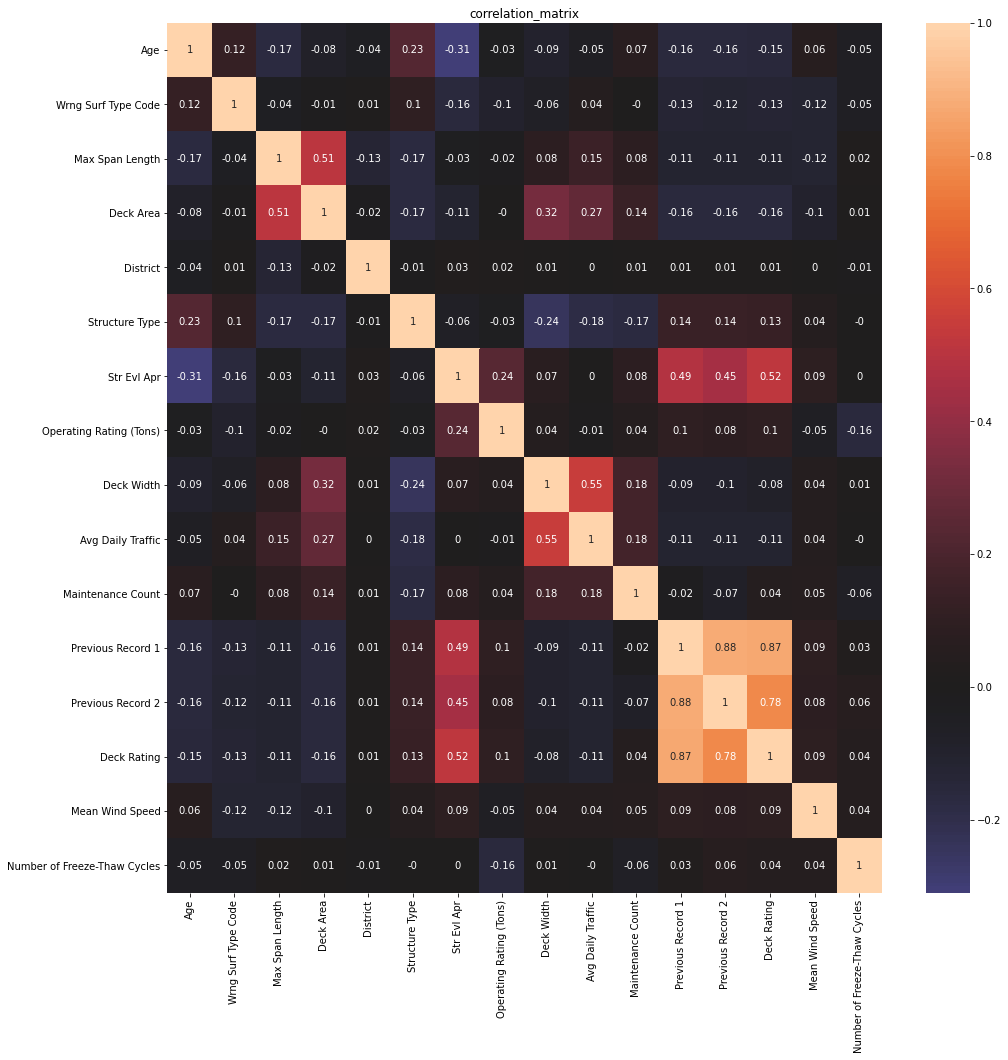

In [103]:
##Correlation Matrix for the selected varibles

df_bridge_cor = df_bridge_main[['Age','Wrng Surf Type Code','Max Span Length','Deck Area','District',
                    'Structure Type','Str Evl Apr','Operating Rating (Tons)','Deck Width','Avg Daily Traffic',
                    'Maintenance Count','Previous Record 1','Previous Record 2','Deck Rating','Mean Wind Speed',
                                'Number of Freeze-Thaw Cycles']]

correlation_matrix = df_bridge_cor.corr().round(2)
plt.figure(figsize =(16,16))
sn.heatmap(correlation_matrix.round(2),center=0,annot=True)
plt.title('correlation_matrix')
plt.show()

In [104]:
## Defininig Input and Output Variable

## Feel Free to Plug-in various input variables in X 
## Confusion Matrix may show some error when the input varibles are changed, kindly change index in print section



X = df_bridge_main[['Age','Wrng Surf Type Code','Max Span Length','Deck Area','District',
                    'Structure Type','Str Evl Apr','Operating Rating (Tons)','Deck Width','Avg Daily Traffic',
                   'Maintenance Count','Previous Record 1','Previous Record 2'
                    ]]
y = df_bridge_main['Deck Rating']



In [105]:
## Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape) 

(12313, 13)
(3079, 13)
(12313,)
(3079,)


# Modle building and Testing

Accuracy with k=1 84.21565443325754
Accuracy with k=3 85.5147775251705
Accuracy with k=5 85.54725560246833
Accuracy with k=7 85.06008444300097
Accuracy with k=9 84.08574212406626


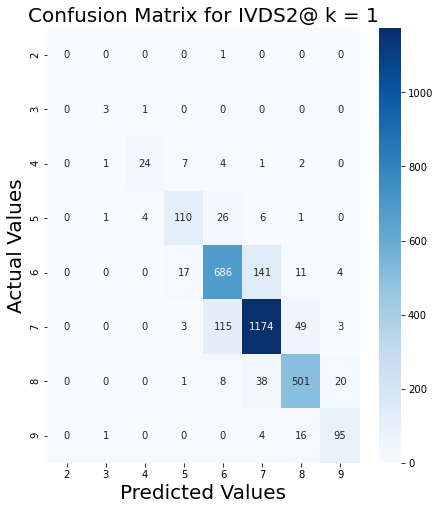

C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.50      0.75      0.60         4
           4       0.83      0.62      0.71        39
           5       0.80      0.74      0.77       148
           6       0.82      0.80      0.81       859
           7       0.86      0.87      0.87      1344
           8       0.86      0.88      0.87       568
           9       0.78      0.82      0.80       116

    accuracy                           0.84      3079
   macro avg       0.68      0.69      0.68      3079
weighted avg       0.84      0.84      0.84      3079



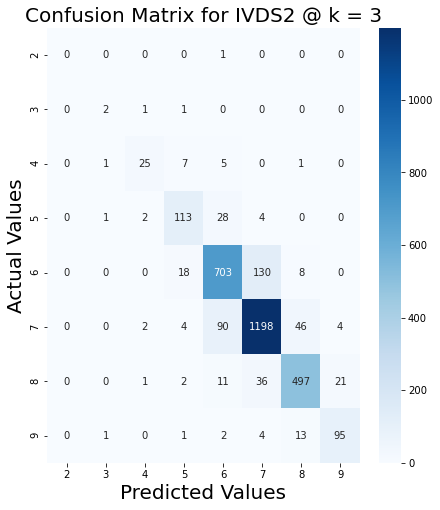

C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.40      0.50      0.44         4
           4       0.81      0.64      0.71        39
           5       0.77      0.76      0.77       148
           6       0.84      0.82      0.83       859
           7       0.87      0.89      0.88      1344
           8       0.88      0.88      0.88       568
           9       0.79      0.82      0.81       116

    accuracy                           0.86      3079
   macro avg       0.67      0.66      0.66      3079
weighted avg       0.85      0.86      0.85      3079



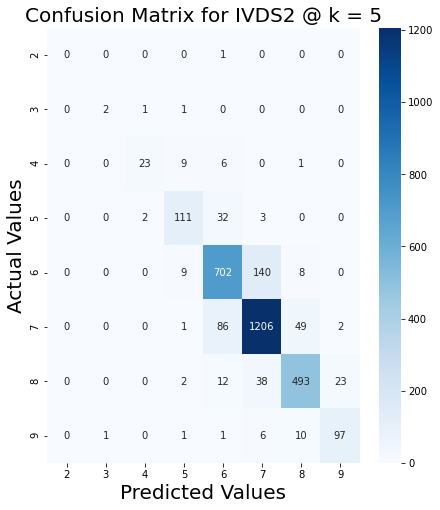

C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.67      0.50      0.57         4
           4       0.88      0.59      0.71        39
           5       0.83      0.75      0.79       148
           6       0.84      0.82      0.83       859
           7       0.87      0.90      0.88      1344
           8       0.88      0.87      0.87       568
           9       0.80      0.84      0.82       116

    accuracy                           0.86      3079
   macro avg       0.72      0.66      0.68      3079
weighted avg       0.86      0.86      0.85      3079



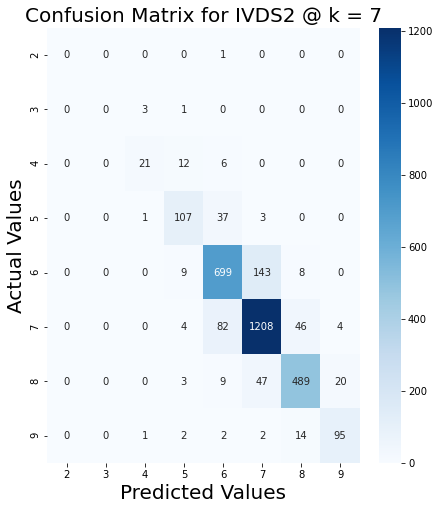

C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.81      0.54      0.65        39
           5       0.78      0.72      0.75       148
           6       0.84      0.81      0.82       859
           7       0.86      0.90      0.88      1344
           8       0.88      0.86      0.87       568
           9       0.80      0.82      0.81       116

    accuracy                           0.85      3079
   macro avg       0.62      0.58      0.60      3079
weighted avg       0.85      0.85      0.85      3079



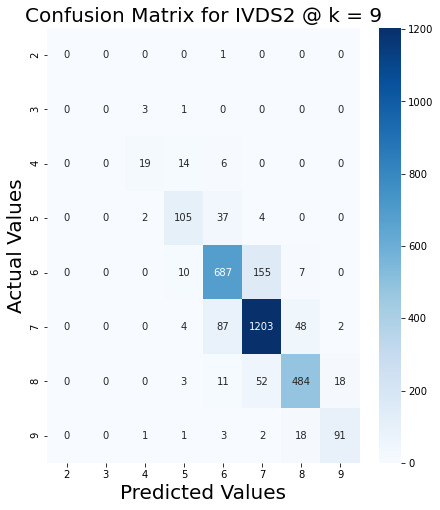

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.76      0.49      0.59        39
           5       0.76      0.71      0.73       148
           6       0.83      0.80      0.81       859
           7       0.85      0.90      0.87      1344
           8       0.87      0.85      0.86       568
           9       0.82      0.78      0.80       116

    accuracy                           0.84      3079
   macro avg       0.61      0.57      0.58      3079
weighted avg       0.84      0.84      0.84      3079



C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avina\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [107]:


# Fitting Data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#KNN Classifier Implementation
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn9 = KNeighborsClassifier(n_neighbors = 9)

#Predictions for the KNN Classifiers
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)
knn9.fit(X_train, y_train)

y_pred_1 = knn1.predict(X_test)
y_pred_3 = knn3.predict(X_test)
y_pred_5 = knn5.predict(X_test)
y_pred_7 = knn7.predict(X_test)
y_pred_9 = knn9.predict(X_test)

## Accuracy Test
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=7", accuracy_score(y_test, y_pred_7)*100)
print("Accuracy with k=9", accuracy_score(y_test, y_pred_9)*100)

##Print 1

con_mat = confusion_matrix(y_test,y_pred_1)

cm_df = pd.DataFrame(con_mat,
                     index = ['2','3','4','5','6','7','8','9'], 
                     columns = ['2','3','4','5','6','7','8','9'])
plt.figure(figsize =(7,8))
sn.heatmap(cm_df,cmap='Blues',annot=True,fmt ='g')
plt.title('Confusion Matrix for IVDS2@ k = 1', fontsize=20)
plt.ylabel('Actual Values', fontsize=20)
plt.xlabel('Predicted Values', fontsize=20)
plt.show()
print(classification_report(y_test,y_pred_1))

##Print 3
    
con_mat = confusion_matrix(y_test,y_pred_3)

cm_df = pd.DataFrame(con_mat,
                     index = ['2','3','4','5','6','7','8','9'], 
                     columns = ['2','3','4','5','6','7','8','9'])
plt.figure(figsize =(7,8))
sn.heatmap(cm_df,cmap='Blues',annot=True,fmt ='g')
plt.title('Confusion Matrix for IVDS2 @ k = 3', fontsize=20)
plt.ylabel('Actual Values', fontsize=20)
plt.xlabel('Predicted Values', fontsize=20)
plt.show()
print(classification_report(y_test,y_pred_3))

#Print 5

con_mat = confusion_matrix(y_test,y_pred_5)

cm_df = pd.DataFrame(con_mat,
                     index = ['2','3','4','5','6','7','8','9'], 
                     columns = ['2','3','4','5','6','7','8','9'])
plt.figure(figsize =(7,8))
sn.heatmap(cm_df,cmap='Blues',annot=True,fmt ='g')
plt.title('Confusion Matrix for IVDS2 @ k = 5', fontsize=20)
plt.ylabel('Actual Values', fontsize=20)
plt.xlabel('Predicted Values', fontsize=20)
plt.show()
print(classification_report(y_test,y_pred_5))

#print 7

con_mat = confusion_matrix(y_test,y_pred_7)

cm_df = pd.DataFrame(con_mat,
                     index = ['2','3','4','5','6','7','8','9'], 
                     columns = ['2','3','4','5','6','7','8','9'])
plt.figure(figsize =(7,8))
sn.heatmap(cm_df,cmap='Blues',annot=True,fmt ='g')
plt.title('Confusion Matrix for IVDS2 @ k = 7', fontsize=20)
plt.ylabel('Actual Values', fontsize=20)
plt.xlabel('Predicted Values', fontsize=20)
plt.show()
print(classification_report(y_test,y_pred_7))


## Print 9

con_mat = confusion_matrix(y_test,y_pred_9)

cm_df = pd.DataFrame(con_mat,
                     index = ['2','3','4','5','6','7','8','9'], 
                     columns = ['2','3','4','5','6','7','8','9'])
plt.figure(figsize =(7,8))
sn.heatmap(cm_df,cmap='Blues',annot=True,fmt ='g')
plt.title('Confusion Matrix for IVDS2 @ k = 9', fontsize=20)
plt.ylabel('Actual Values', fontsize=20)
plt.xlabel('Predicted Values', fontsize=20)
plt.show()
print(classification_report(y_test,y_pred_9))


